# Exploration of Kalman Filter for PTA parameter estimation

This notebook explores the use of a linear Kalman filter to recover the underling state evolution of a pulsar frequency timeseries.

It also discusses the use of likelihood methods for parameter estimation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

## 1. Heterodyne experiment


We can generate some synthetic data, and run the Kalman filter to see how well we recover the state.

The Kalman filter depends on a series of physical parameters (e.g. GW angular frequency). 

Lets assume we know these perfectly, and see how the filter does.

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

In [4]:
import numpy as np 


# Example Setup
P   = SystemParameters(Npsr=2,h=1e-2,σp=0.0,σm=1e-13,use_psr_terms_in_data=True,use_psr_terms_in_model=True)       #define the system parameters as a class
PTA = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data


Attention: You are including the PSR terms in your synthetic data generation
Heterodyning: False


Attention: You are including the PSR terms in your measurement model
Running the KF with non-heterodyned settings
Guess of initial xo:
[186.85502559 369.66381945]
observations
[186.85502559 369.66381945]
Ideal likelihood =  29616.571258965872
Mean residual: -5.2596496762012016e-14


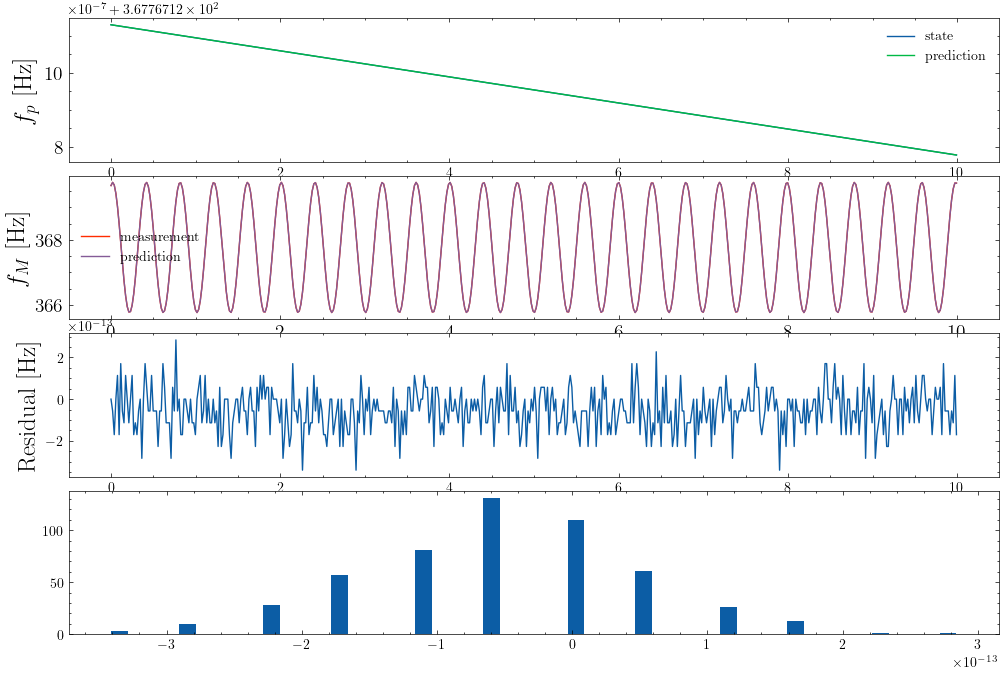

In [5]:


#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
#guessed_parameters["sigma_m"] = 0.1
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(guessed_parameters)
print("Ideal likelihood = ", model_likelihood)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)


### Null model experiment

Attention: You are including the PSR terms in your synthetic data generation
Heterodyning: False
Attention: You are using just the null measurement model
Running the KF with non-heterodyned settings
Ideal likelihood =  -2.9973046031766033e+30
Mean residual: -0.08650560827719855


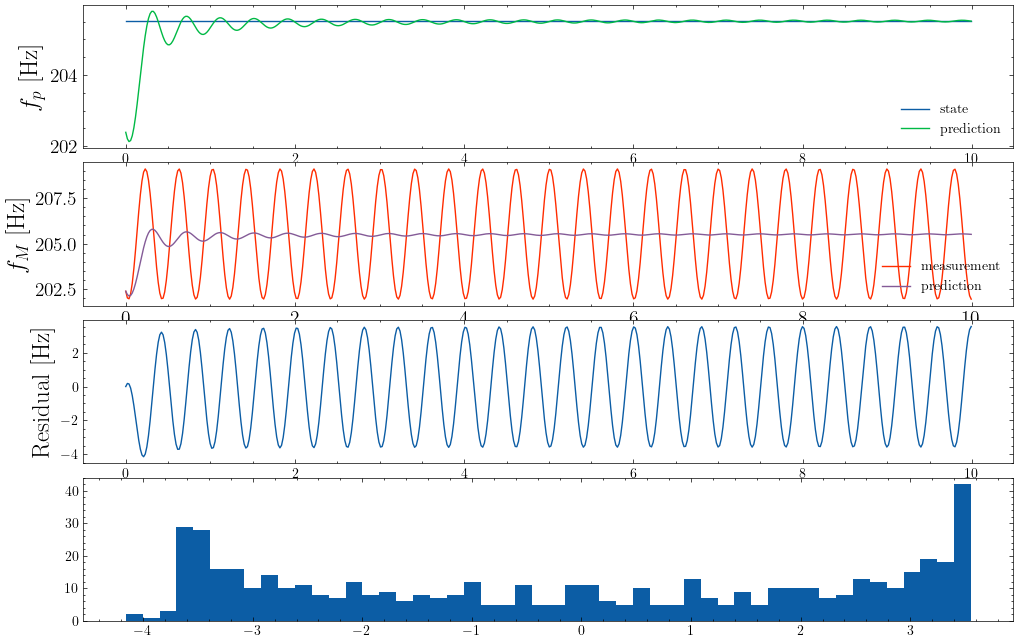

In [7]:
import numpy as np 


# Example Setup
P   = SystemParameters(h=1e-2,σp=0.0,σm=1e-13,use_psr_terms_in_data=True,noise_model=True)       #define the system parameters as a class
PTA = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data





#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
#guessed_parameters["sigma_m"] = 0.1
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(guessed_parameters)
print("Ideal likelihood = ", model_likelihood)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)

